In [ ]:
# to do

# add comments under results from log rank test
# add comments under cox proportional hazards model

# add more EDA 

In [1]:
# general packages
import pandas as pd
import numpy as np

# specialized stats packages
from lifelines import KaplanMeierFitter

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# preferences
%matplotlib inline

In [2]:
# data
from lifelines.datasets import load_psychiatric_patients

df = load_psychiatric_patients()

In [3]:
df.head()

,Age,T,C,sex
0,51,1,1,2
1,58,1,1,2
2,55,2,1,2
3,28,22,1,2
4,21,30,0,1


In [4]:
df.describe()

,Age,T,C,sex
count,26.000000,26.000000,26.000000,26.000000
mean,35.153846,26.423077,0.538462,1.576923
std,10.479284,11.559146,0.508391,0.503831
min,19.000000,1.000000,0.000000,1.000000
25%,28.250000,22.500000,0.000000,1.000000
50%,32.500000,30.500000,1.000000,2.000000
75%,42.500000,34.750000,1.000000,2.000000
max,58.000000,40.000000,1.000000,2.000000


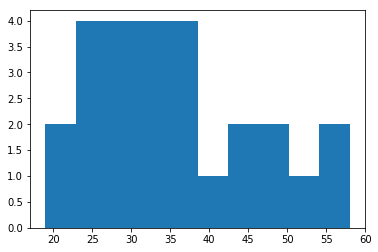

In [5]:
plt.hist(df.Age);

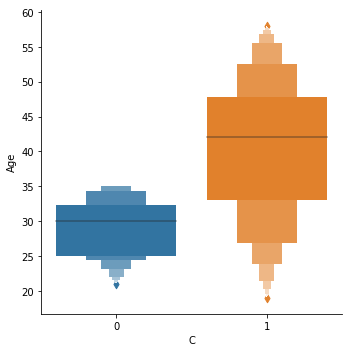

In [17]:
sns.catplot(x="C", y="Age", kind="boxen",
            data=df.sort_values("C"));

# Kaplan-Meier curve

In [6]:
kmf = KaplanMeierFitter()
T = df["T"] #duration
C = df["C"] 

In [7]:
kmf.fit(T,C);

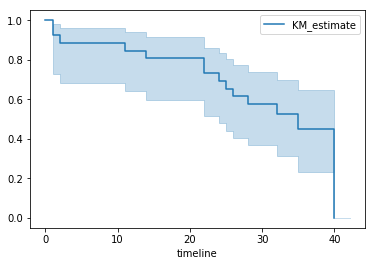

In [8]:
kmf.survival_function_
kmf.median_
kmf.plot()

## Kaplan-Meier curve plotted separately for men and women

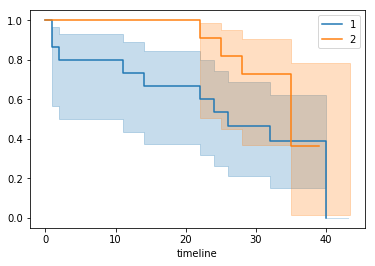

In [10]:
# plot both genders on the same plot

groups = df['sex']
ix = (groups == 1)

kmf.fit(T[~ix], C[~ix], label='1')
ax = kmf.plot()

kmf.fit(T[ix], C[ix], label='2')
kmf.plot(ax=ax)

# Hazard rate using Nelson-Aalen estimator

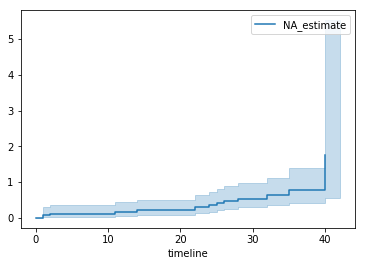

In [22]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=C);
naf.plot()

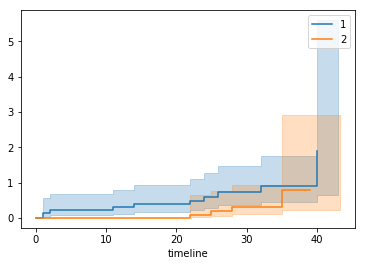

In [23]:
naf.fit(T[~ix], C[~ix], label='1')
ax = naf.plot()

naf.fit(T[ix], C[ix], label='2')
naf.plot(ax=ax)

# Statistical analysis of differences

## Is there a difference between survival rate for two groups? Log rank test

In [12]:
 from lifelines.statistics import logrank_test

 results = logrank_test(T[ix], T[~ix], event_observed_A=C[ix], event_observed_B=C[~ix])
 results.print_summary()

Results
   t 0: -1
   test: logrank
   alpha: 0.95
   null distribution: chi squared
   df: 1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.20485 |              1.607 |  Cannot Reject Null |       False       


## What factors influence the survival? Cox Proportional Hazards Model

In [14]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, duration_col='T', event_col='C', show_progress=True)

cph.print_summary()  

Convergence completed after 5 iterations.
n=26, number of events=14

       coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
Age  0.2075     1.2306    0.0583  3.5606 0.0004      0.0933      0.3218  ***
sex -0.5237     0.5923    0.7375 -0.7101 0.4776     -1.9696      0.9221     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.816
